# 4. Übung Nichtlineare Regelungstechnik 1, Aufgabe 10

## Anwendung des Satzes von LaSalle

System:

\begin{align*}
\dot x_1 &= x_2\\
\dot x_2 &= -h_1(x_1) - h_2(x_2)
\end{align*}

mit $(x_1,x_2) \in \mathbb{R}$, $h_1(x_1) = \sin(x_1)$ und $h_2(x_2) = - x_2^3 - 2x_2^3 + 8 x_2$.

In diesem Notebook wird die Stabilität der Ruhelage im Ursprung des Systems untersucht. Auch wenn die Aufgabe nur überschaubare Rechnungen erfordert, wird die Toolbox SymPy zur symbolischen Rechnung verwendet, um deren Anwendung an einfachen Beispielen zu erläutern.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2022-2023 Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

## Vorbereitungen
Import benötigter Module

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()  # Damit SymPy Ergebnisse orderntlich dargestellt werden

# True setzen, damit alle Bilder als pdf exportiert werden
export_figs = False

Definition der unabhängigen symbolischen Variablen

In [2]:
x1_sym, x2_sym = sp.symbols("x_1, x_2")

Definition der Funktionen $h_1$ und $h_2$

In [3]:
h1_sym = sp.sin(x1_sym)
h1_sym

In [4]:
h2_sym = -x2_sym**3 - 2 * x2_sym**2 + 8 * x2_sym
h2_sym

## Untersuchung der Funktionen $h_1$ und $h_2$

Die Funktion $\sin(x_1)$ hat Nullstellen bei $x_1 = \pm k \pi$ mit $k \in \mathbb{Z}$ Damit gilt $x_1 \sin(x_1) > 0$ $\forall$ $x_1 \in (-\pi, \pi) \setminus \{0\}$.

Zur Untersuchung der Funktion $h_2$ bestimmen wir deren Nullstellen:

In [5]:
sp.roots(h2_sym, x2_sym)

Es liegen einfache Nullstellen bei 4, 0 und 2 vor. Die geforderte Eigenschaft wird also nur im offenen Intervall $(-4, 2)$ vorliegen.

Zur Veranschaulichung sollen die Funktionen geplottet werden. Dazu werden die symbolischen Ausdrücke für $h_1$ und $h_2$ in numerisch auswertbare Funktionen umgewandelt (`lambdify`). Der Aufruf `h1_func(1.2)` liefert dann beispielsweise die Funktion $h_1$ ausgewertet für $x = 1.2$ zurück. Anschließend werden die Bereiche von $x_1$ und $x_2$ zur Auswertung festgelegt und der Plot ausgeführt.

In [6]:
h1_func = sp.lambdify(x1_sym, h1_sym, modules="numpy")
h2_func = sp.lambdify(x2_sym, h2_sym, modules="numpy")

In [7]:
x1 = np.linspace(-3.5, 3.5, 100)
x2 = np.linspace(-4.25, 2.5, 100)

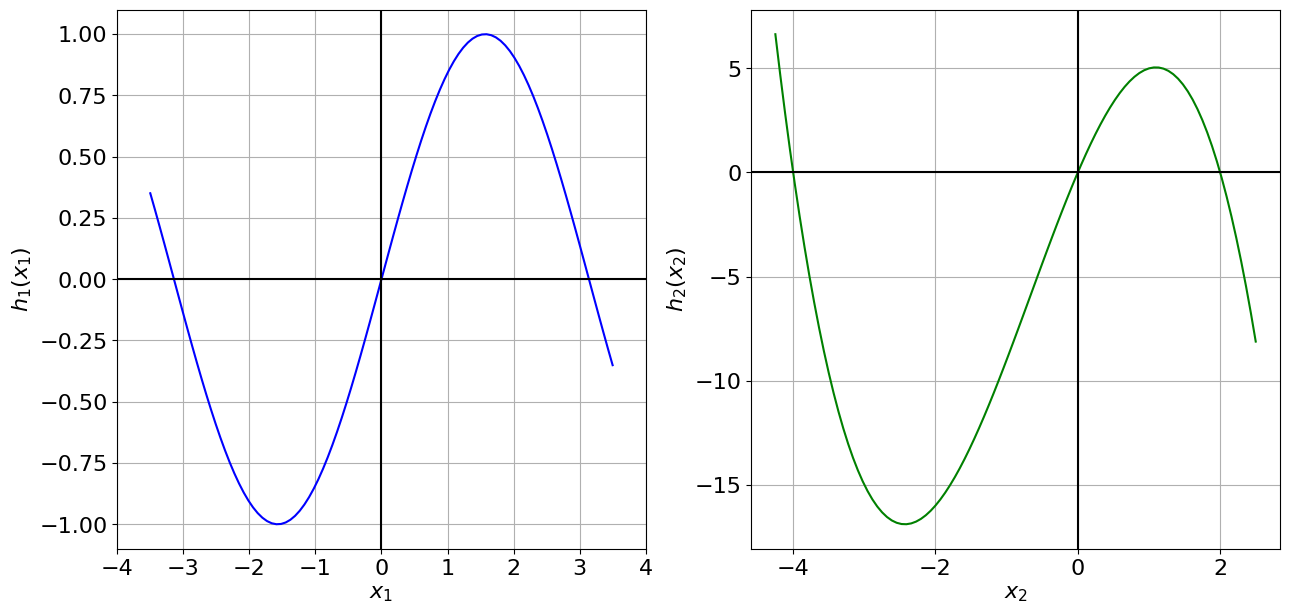

In [8]:
plt.rcParams["font.size"] = 16
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.plot(x1, h1_func(x1), color="blue")
plt.gca().set_xticks(np.arange(-4, 5, 1))
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$x_1$")
plt.ylabel("$h_1(x_1)$")

plt.subplot(122)
plt.plot(x2, h2_func(x2), color="green")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$x_2$")
plt.ylabel("$h_2(x_2)$")

if export_figs:
    plt.savefig("lasalle_h1_h2_funcs.pdf")

## Anwendung der direkten Methode von Ljapunov

Hierfür benötigen wir zunächst das Vektorfeld $f$ aus der Dgl. $\dot x = f(x)$, also die rechte Seite der Dgl. Dies wird bei der Berechnung von $\dot V = \mathcal{L}_f V(x) = \frac{\partial V}{\partial x} f(x)$ benötigt:

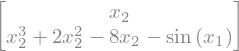

In [9]:
f = sp.Matrix([x2_sym, -h1_sym - h2_sym])
f

Berechnung der expliziten Form des Lajpunov-Funktions-Kandidaten
\begin{equation*}
V(x_1, x_2) = \int_0^{x_1} h_1(\xi)\mathrm{d}\xi + \frac{1}{2}x_2^2
\end{equation*}

In [10]:
V_sym = sp.integrate(h1_sym, (x1_sym, 0, x1_sym)) + 0.5 * x2_sym**2
V_sym

Berechnung der Zeitableitung:
\begin{equation*}
\dot V(x_1, x_2) = \frac{\partial V}{\partial x_1} f_1(x_1, x_2) + \frac{\partial V}{\partial x_2} f_2(x_1, x_2)
\end{equation*}
Wie ersichtlich, hängt diese nur noch von $x_2$ ab und ist damit nur negativ semidefinit.

In [11]:
VDot_sym = sp.diff(V_sym, x1_sym) * f[0] + sp.diff(V_sym, x2_sym) * f[1]
VDot_sym.simplify()

*Bemerkung*: Ein mehr pythonischer Weg dies zu tun ist

```python
VDot_sym = sp.Matrix( [V_sym.diff(arg) for arg in V_sym.free_symbols] ).T * f
VDot_sym.simplify()
```
(man muss dann die unabhängigen Variablen nicht explizit angeben, geht also auch für höhere Zustandsraumdefinitionen)

## Veranschaulichung von $V$ und $\dot V$

Hierfür müssen die symbolischen Ausdrücke wieder in numerisch auswertbare Funktionen umgewandelt werden:

In [12]:
V_func = sp.lambdify((x1_sym, x2_sym), V_sym, modules="numpy")
VDot_func = sp.lambdify((x1_sym, x2_sym), VDot_sym, modules="numpy")

$\dot V$ ist tatsächlich auf dem offenen Intervall $(-4, 2)$ negativ definit im Ursprung:

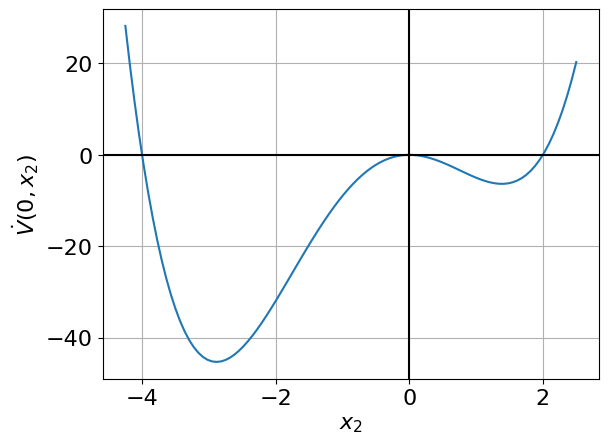

In [13]:
plt.plot(x2, VDot_func(0, x2))
plt.axhline(color="k")
plt.axvline(color="k")
plt.grid()
plt.xlabel("$x_2$")
plt.ylabel("$\dot V(0, x_2)$")

if export_figs:
    plt.tight_layout()
    plt.savefig("lasalle_h1_h2_VDot_x2.pdf")

## Plotten der Niveaulinien von $V$ und des Flusses des Systems

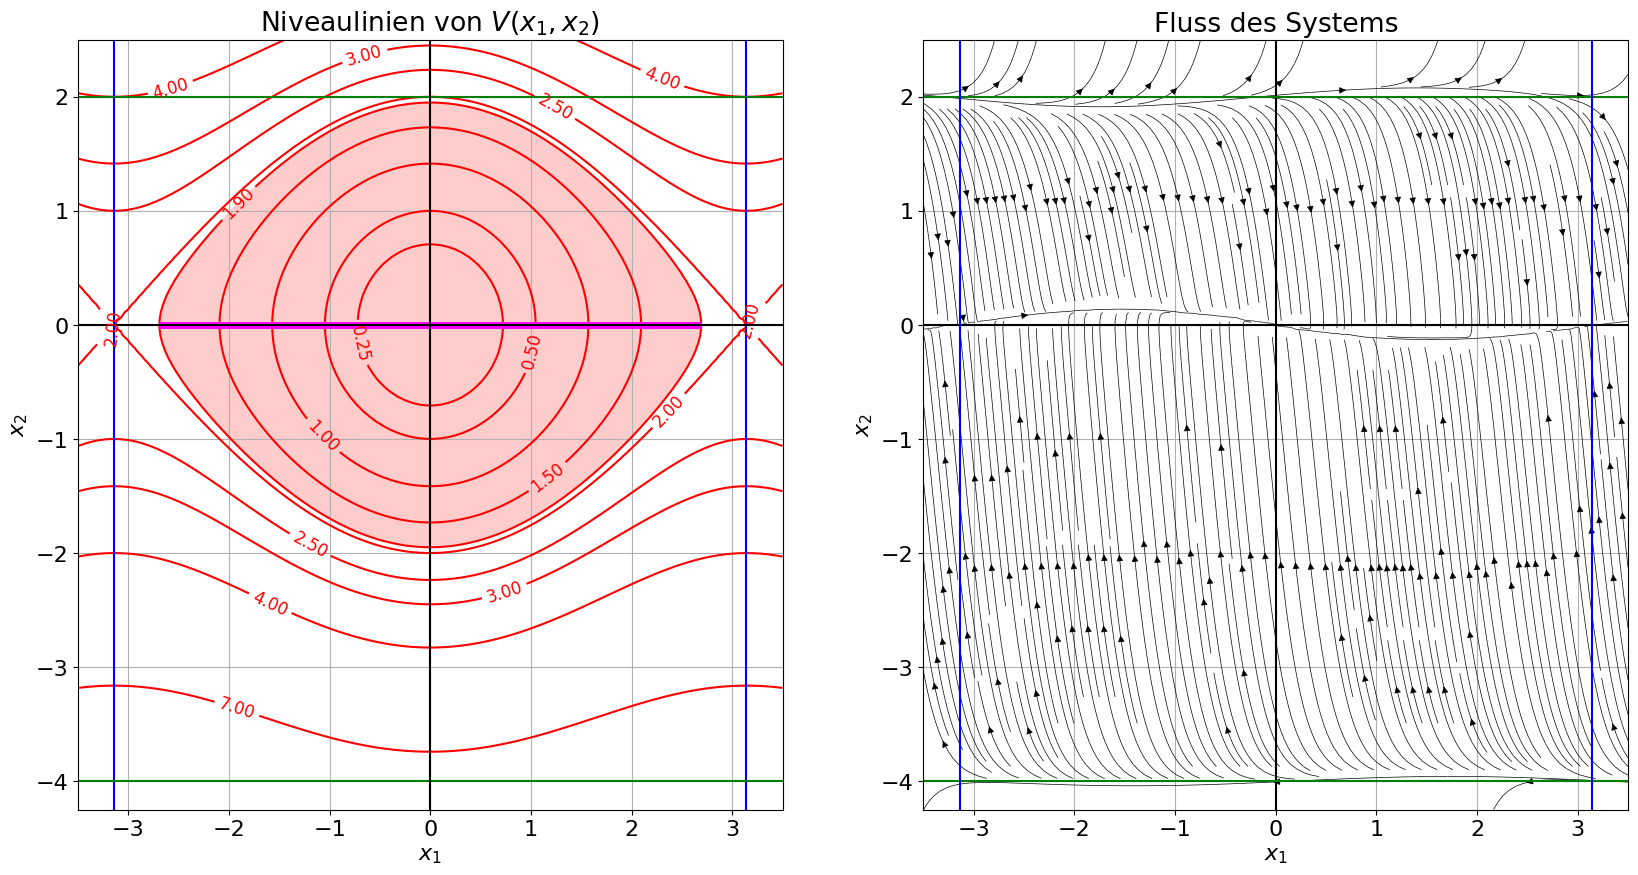

In [14]:
xx1, xx2 = np.meshgrid(x1, x2)

l = 1.9  # willkürlich gewähltes Niveau kleiner 2

plt.figure(figsize=(20, 10))

# ======================================
# V mit Niveaulinien und Bereichsgrenzen
# ======================================
plt.subplot(121)

# Niveaulinien von V
cntr = plt.contour(xx1, xx2, V_func(xx1, xx2), levels=[0.25, 0.5, 1, 1.5, 1.9, 2, 2.5, 3, 4, 7], colors="red")
plt.gca().clabel(cntr, inline=True, fontsize=12)

# Menge \Omega_l
plt.contourf(xx1, xx2, V_func(xx1, xx2), levels=[0, l], colors="red", alpha=0.2)
plt.grid()

# Grenzen für h_1
plt.axvline(x=-np.pi, color="blue")
plt.axvline(x=np.pi, color="blue")

# Grenzen für h_2
plt.axhline(y=2, color="green")
plt.axhline(y=-4, color="green")

# Niveaulinien von VDot
#cntr = plt.contour(xx1, xx2, VDot_func(xx1, xx2), levels=[-3, -1, 0, 1], colors="green")
#plt.gca().clabel(cntr, inline=True, fontsize=12)

# Menge R
plt.hlines(0, -np.arccos(1 - l), np.arccos(1 - l), linewidth=5, color="magenta")

# Hübsch machen
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Niveaulinien von $V(x_1, x_2)$")


# ========================================
# Fluss des Systems im betrachteten Gebiet
# ========================================
plt.subplot(122)
plt.streamplot(xx1, xx2, xx2, -h1_func(xx1) - h2_func(xx2), density=3, linewidth=0.5, color="k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.axhline(y=2, color="green")
plt.axhline(y=-4, color="green")
plt.axvline(x=-np.pi, color="blue")
plt.axvline(x=np.pi, color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Fluss des Systems")

if export_figs:
    plt.tight_layout()
    plt.savefig("lasalle_h1_h2_niveaulinien.pdf")